# [Hyper Parameter Tuning](https://youtu.be/mDEV0Iucwz0?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH)

Decision trees are prone to **Overfitting**.. and one of the main reasons it happens is because of the arameter max_depth. if its very large... the data will keep splitting... until it creates very small regions that only have like 2 or 3 data point... and there is also a chance that those are outliers, cuz otherwise they would have been together with the neighbouring ones... now if another new test entry comes and falls into that region when it clearly shouldn't have gone there, creates the problem. it all caused just because of bad tuning of max_depth...  


![ytss](assets/15_overfitting.png)

---

Next up is **Underfitting**, can also happen because of bad tuning of max_depth parameter... let's you just took max_depth has 1. it wont go to leaf node.. and will decide on majority label in each region... look at the ss below to understand.  

![ytss](assets/16_underfitting.png)

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

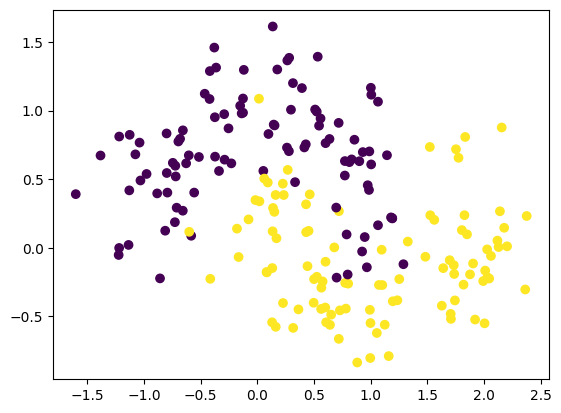

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def visualize_tree(X, y, max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)

    # mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(f"Decision Tree (max_depth={max_depth})")
    plt.show()


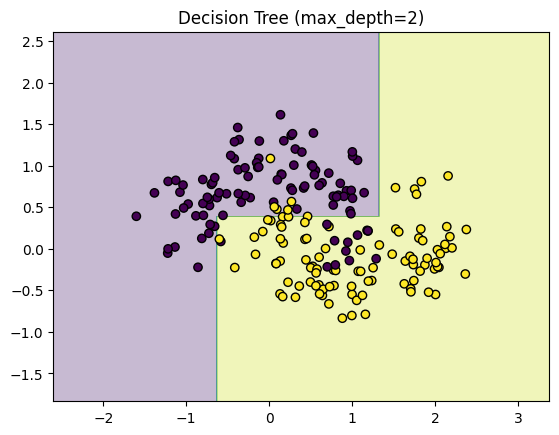

In [24]:
visualize_tree(X,y,2)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def visualize_tree_advanced(
    X, y,
    criterion='gini',     
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0
):
    clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease
    )
    clf.fit(X, y)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(f"Decision Tree (max_depth={max_depth}, criterion={criterion})")
    plt.show()

    # Print per-node information
    print("Node information:")
    tree = clf.tree_
    for i in range(tree.node_count):
        print(f"Node {i}: samples={tree.n_node_samples[i]}, impurity={tree.impurity[i]:.4f}, value={tree.value[i]}")

    print(f"\nTotal leaf nodes: {clf.get_n_leaves()}")


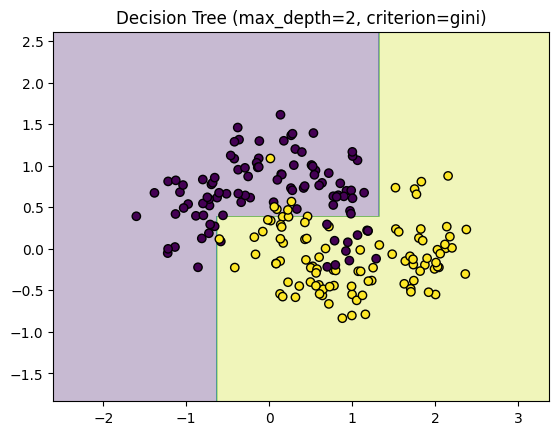

Node information:
Node 0: samples=200, impurity=0.5000, value=[[0.5 0.5]]
Node 1: samples=111, impurity=0.3068, value=[[0.18918919 0.81081081]]
Node 2: samples=89, impurity=0.1995, value=[[0.88764045 0.11235955]]
Node 3: samples=8, impurity=0.0000, value=[[1. 0.]]
Node 4: samples=103, impurity=0.2206, value=[[0.12621359 0.87378641]]
Node 5: samples=84, impurity=0.1120, value=[[0.94047619 0.05952381]]
Node 6: samples=5, impurity=0.0000, value=[[0. 1.]]

Total leaf nodes: 4


In [27]:
visualize_tree_advanced(
    X, y,
    criterion='gini',
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    max_leaf_nodes=10,
    min_impurity_decrease=0.01
)